In [3]:
# 一元线性回归例子
# 需要使用scikit-learn库
# 可以用
# %pip install scikit-learn
# 安装

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

# 数据文件为data.csv和代码放在一个目录下，直接读取
data = pd.read_csv('data.csv', header=0)
data # 数据量很小

,square_feet,price
0,150,6450
1,200,7450
2,250,8450
3,300,9450
4,350,11450
5,400,15450
6,600,18450


In [5]:
# 定义出特征矩阵X和标签向量y
X, y = np.array(data['square_feet']).reshape(-1,1), data['price']
print('Shape of X is {}. Shape of y is {}'.format(X.shape, y.shape))
# 建立回归模型
lm_reg = lm.LinearRegression()
lm_reg.fit(X, y) # 拟合

Shape of X is (7, 1). Shape of y is (7,)


LinearRegression()

In [6]:
# 查看截距项 w0
lm_reg.intercept_

1771.8085106382932

In [7]:
# 查看系数项 w1
lm_reg.coef_[0]

28.77659574468086

In [8]:
# 查看拟合的R^2 (score)
lm_reg.score(X, y)

0.9446685860359431

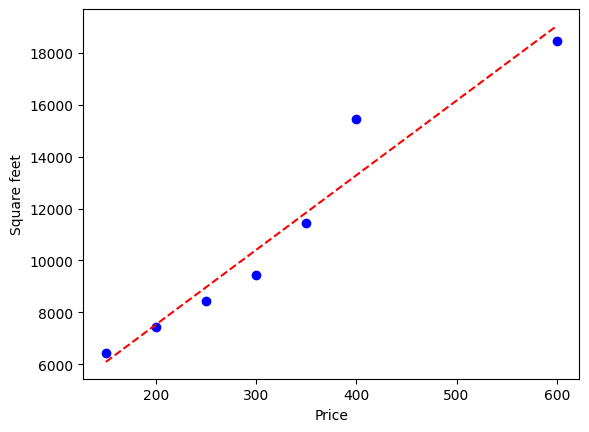

In [9]:
# 绘制拟合图像
yf = lm_reg.predict(X)
plt.scatter(X, y, color='blue')
plt.plot(X, yf, color='red', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Square feet')
plt.show()

In [10]:
# 多元线性回归案例
data = pd.read_csv('Advertising.csv', index_col=0)
data # 有三个特征：TV、radio、newspaper、sales

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


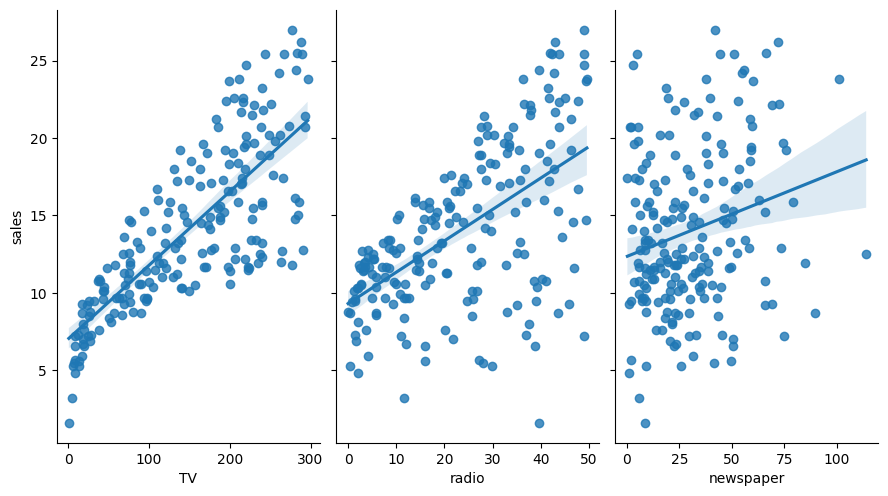

In [11]:
import seaborn as sns # 使用seaborn绘图库
# 绘制三个图, 对应三个特征
# y-TV
# y-radio
# y-newspaper
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=0.6, kind='reg')
plt.show() # 可以发现TV和y具有较好的拟合效果

In [13]:
# 多元回归分析
# 特征矩阵
feas_cols = ['TV', 'radio', 'newspaper']
X = data[feas_cols]

# 标签向量
y = data['sales']

# 训练集：拟合线性回归模型
# 测试集：评估模型在样本外的表现

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print('Shape of train set is {}. Shape of test set is {}'.format(X_train.shape, X_test.shape))

Shape of train set is (160, 3). Shape of test set is (40, 3)


In [14]:
from sklearn.linear_model import LinearRegression as LR
lin_reg = LR()
lin_mdl = lin_reg.fit(X_train, y_train) # 使用训练集数据进行拟合
print(lin_reg.intercept_) # 截距项
print(lin_reg.coef_) # 系数

2.8461141437749795
[ 0.04663401  0.19420538 -0.00702415]


In [16]:
# 联合展示
print(*zip(feas_cols, lin_reg.coef_))

('TV', 0.04663401209973203) ('radio', 0.19420537964565598) ('newspaper', -0.0070241481146919305)


In [18]:
# 使用最小二乘法计算回归方程的解析解
import numpy as np
Xa = np.ones((X_train.shape[0], 1+X_train.shape[1])) # axis-1上加1列，表示截距项
Xa[:, 1:] = X_train.values
ya = y_train.values.reshape(-1, 1)
coefs = np.linalg.inv(Xa.T@Xa)@(Xa.T)@ya.ravel() # (X'X)(-1)X'y
feas_cols_int = ['intercept', *feas_cols]
print(*zip(feas_cols_int, coefs))

('intercept', 2.846114143774976) ('TV', 0.046634012099732086) ('radio', 0.19420537964565604) ('newspaper', -0.007024148114691856)


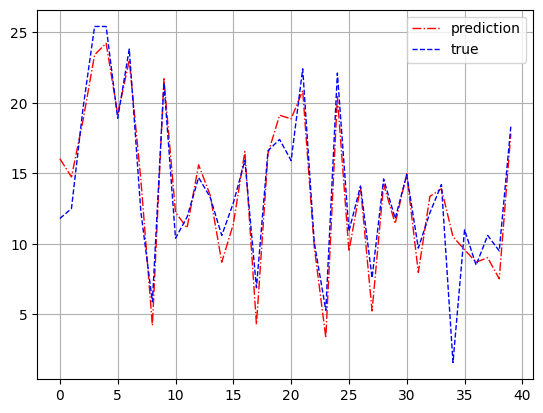

In [23]:
# 绘制回归模型在测试集上的表现
y_pred = lin_reg.predict(X_test)
Xp = np.arange(len(y_pred))

plt.plot(Xp, y_pred, 'r-.', lw=1, label='prediction')
plt.plot(Xp, y_test, 'b--', lw=1, label='true')
plt.legend(loc='best')
plt.grid()
plt.show()

In [25]:
# 回归评估指标
from sklearn.metrics import mean_squared_error as MSE

# Test
print('On Test: Mean Squared Error of the Linear Model is {:.4f}'.format(MSE(y_pred, y_test)))

On Test: Mean Squared Error of the Linear Model is 4.4179


In [28]:
# 手动计算 MSE
mse = 0
for i in range(len(y_pred)):
    mse += (y_pred[i] - y_test.values[i])**2 / len(y_pred)
    
print('On Test: Mean Squared Error of the Linear Model by hand is {:.4f}'.format(mse))

# Train
print('On Train: Mean Squared Error of the Linear Model is {:.4f}'.format(MSE(y_train, lin_reg.predict(X_train))))

On Test: Mean Squared Error of the Linear Model by hand is 4.4179
On Train: Mean Squared Error of the Linear Model is 2.4027


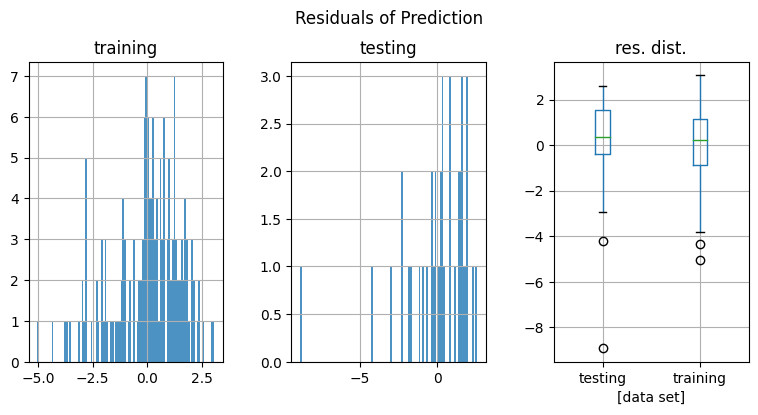

In [29]:
# 绘制指标分布图
from pandas import DataFrame as DF

# 在训练集上的拟合误差
pred_error_train = DF({
    'residual': y_train - lin_reg.predict(X_train),
    'data set': 'training'
})

# 在测试集上的拟合误差
pred_error_test = DF({
    'residual': y_test - lin_reg.predict(X_test),
    'data set' : 'testing'
})

# 合并以上两个Data Frame
box_data = pd.concat([pred_error_train, pred_error_test], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3) # 图像分区域 1行3列
fig.set_size_inches(9, 4) # 图像尺寸设置
common = {'bins':100, 'alpha': 0.8} # box图参数，bin的数量为100， 透明度80%

pred_error_train.hist(ax=axes[0], **common)
pred_error_test.hist(ax=axes[1], **common)
box_data.boxplot(ax=axes[2], by='data set') # 根据 key (data set)区分两个数据集

axes[0].set_title('training')
axes[1].set_title('testing')
axes[2].set_title('res. dist.') # 误差分布

plt.suptitle('Residuals of Prediction')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()